# 🤖 Exploratory data analysis (EDA)

### Authors:
| Name                          | Github user                                        |
|-------------------------------|----------------------------------------------------|
| Sergio Herreros Fernández     | [@SergioHerreros](https://github.com/SERGI0HERREROS)|
| Francisco Javier Luna Ortiz   | [@Lunao01](https://github.com/Lunao01)|
| Carlos Romero Navarro         | [@KarManiatic](https://github.com/KarManiatic)|
| Tatsiana Shelepen             | [@Naschkatzee](https://github.com/Naschkatzee) | 

## 1. Introduction

### 1.1. Problem description

The goal of this project is to predict the probability that people receive two types of vaccines:
- H1N1 flu vaccine.
- Seasonal flu vaccine.

All the information is on the following site:<br>
https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/

### 1.2. Labels

There are two target variables:
- **h1n1_vaccine** - Whether respondent received H1N1 flu vaccine.
- **seasonal_vaccine** - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes.

### 1.3. Features

List of features:

- **h1n1_concern** - Level of concern about the H1N1 flu.
    - 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

- **h1n1_knowledge** - Level of knowledge about H1N1 flu.
    - 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

- **behavioral_antiviral_meds** - Has taken antiviral medications. (binary)

- **behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. (binary)

- **behavioral_face_mask** - Has bought a face mask. (binary)

- **behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. (binary)

- **behavioral_large_gatherings** - Has reduced time at large gatherings. (binary)

- **behavioral_outside_home** - Has reduced contact with people outside of own household. (binary)

- **behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. (binary)

- **doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. (binary)

- **doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. (binary)

- **chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

- **child_under_6_months** - Has regular close contact with a child under the age of six months. (binary)

- **health_worker** - Is a healthcare worker. (binary)

- **health_insurance** - Has health insurance. (binary)

- **opinion_h1n1_vacc_effective** - Respondent's opinion about H1N1 vaccine effectiveness.
    - 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

- **opinion_h1n1_risk** - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
    - 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

- **opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.
    - 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

- **opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.
    - 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

- **opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
    - 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
    
- **opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.
    - 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

- **age_group** - Age group of respondent.

- **education** - Self-reported education level.

- **race** - Race of respondent.

- **sex** - Sex of respondent.

- **income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.

- **marital_status** - Marital status of respondent.

- **rent_or_own** - Housing situation of respondent.

- **employment_status** - Employment status of respondent.

- **hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.

- **census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

- **household_adults** - Number of other adults in household, top-coded to 3.

- **household_children** - Number of children in household, top-coded to 3.

- **employment_industry** - Type of industry respondent is employed in. Values are represented as short random character strings.

- **employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.

**Note:** For all binary variables: 0 = No; 1 = Yes.

## 2. Load Data

- **Import libraries and the datasets**

In [55]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder

# Data
training_set_features_df = pd.read_csv('data/training_set_features.csv', index_col='respondent_id') # training set features

training_set_labels_df = pd.read_csv('data/training_set_labels.csv', index_col='respondent_id') # training set labels

test_set_features_df = pd.read_csv('data/test_set_features.csv', index_col='respondent_id') # test set features

## 3. EDA

### 3.1. Training set features

In [56]:
training_set_features_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [57]:
training_set_features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [58]:
training_set_features_df.head(5)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [59]:
training_set_features_df.shape

(26707, 35)

In [60]:
training_set_features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


Distribution plots.

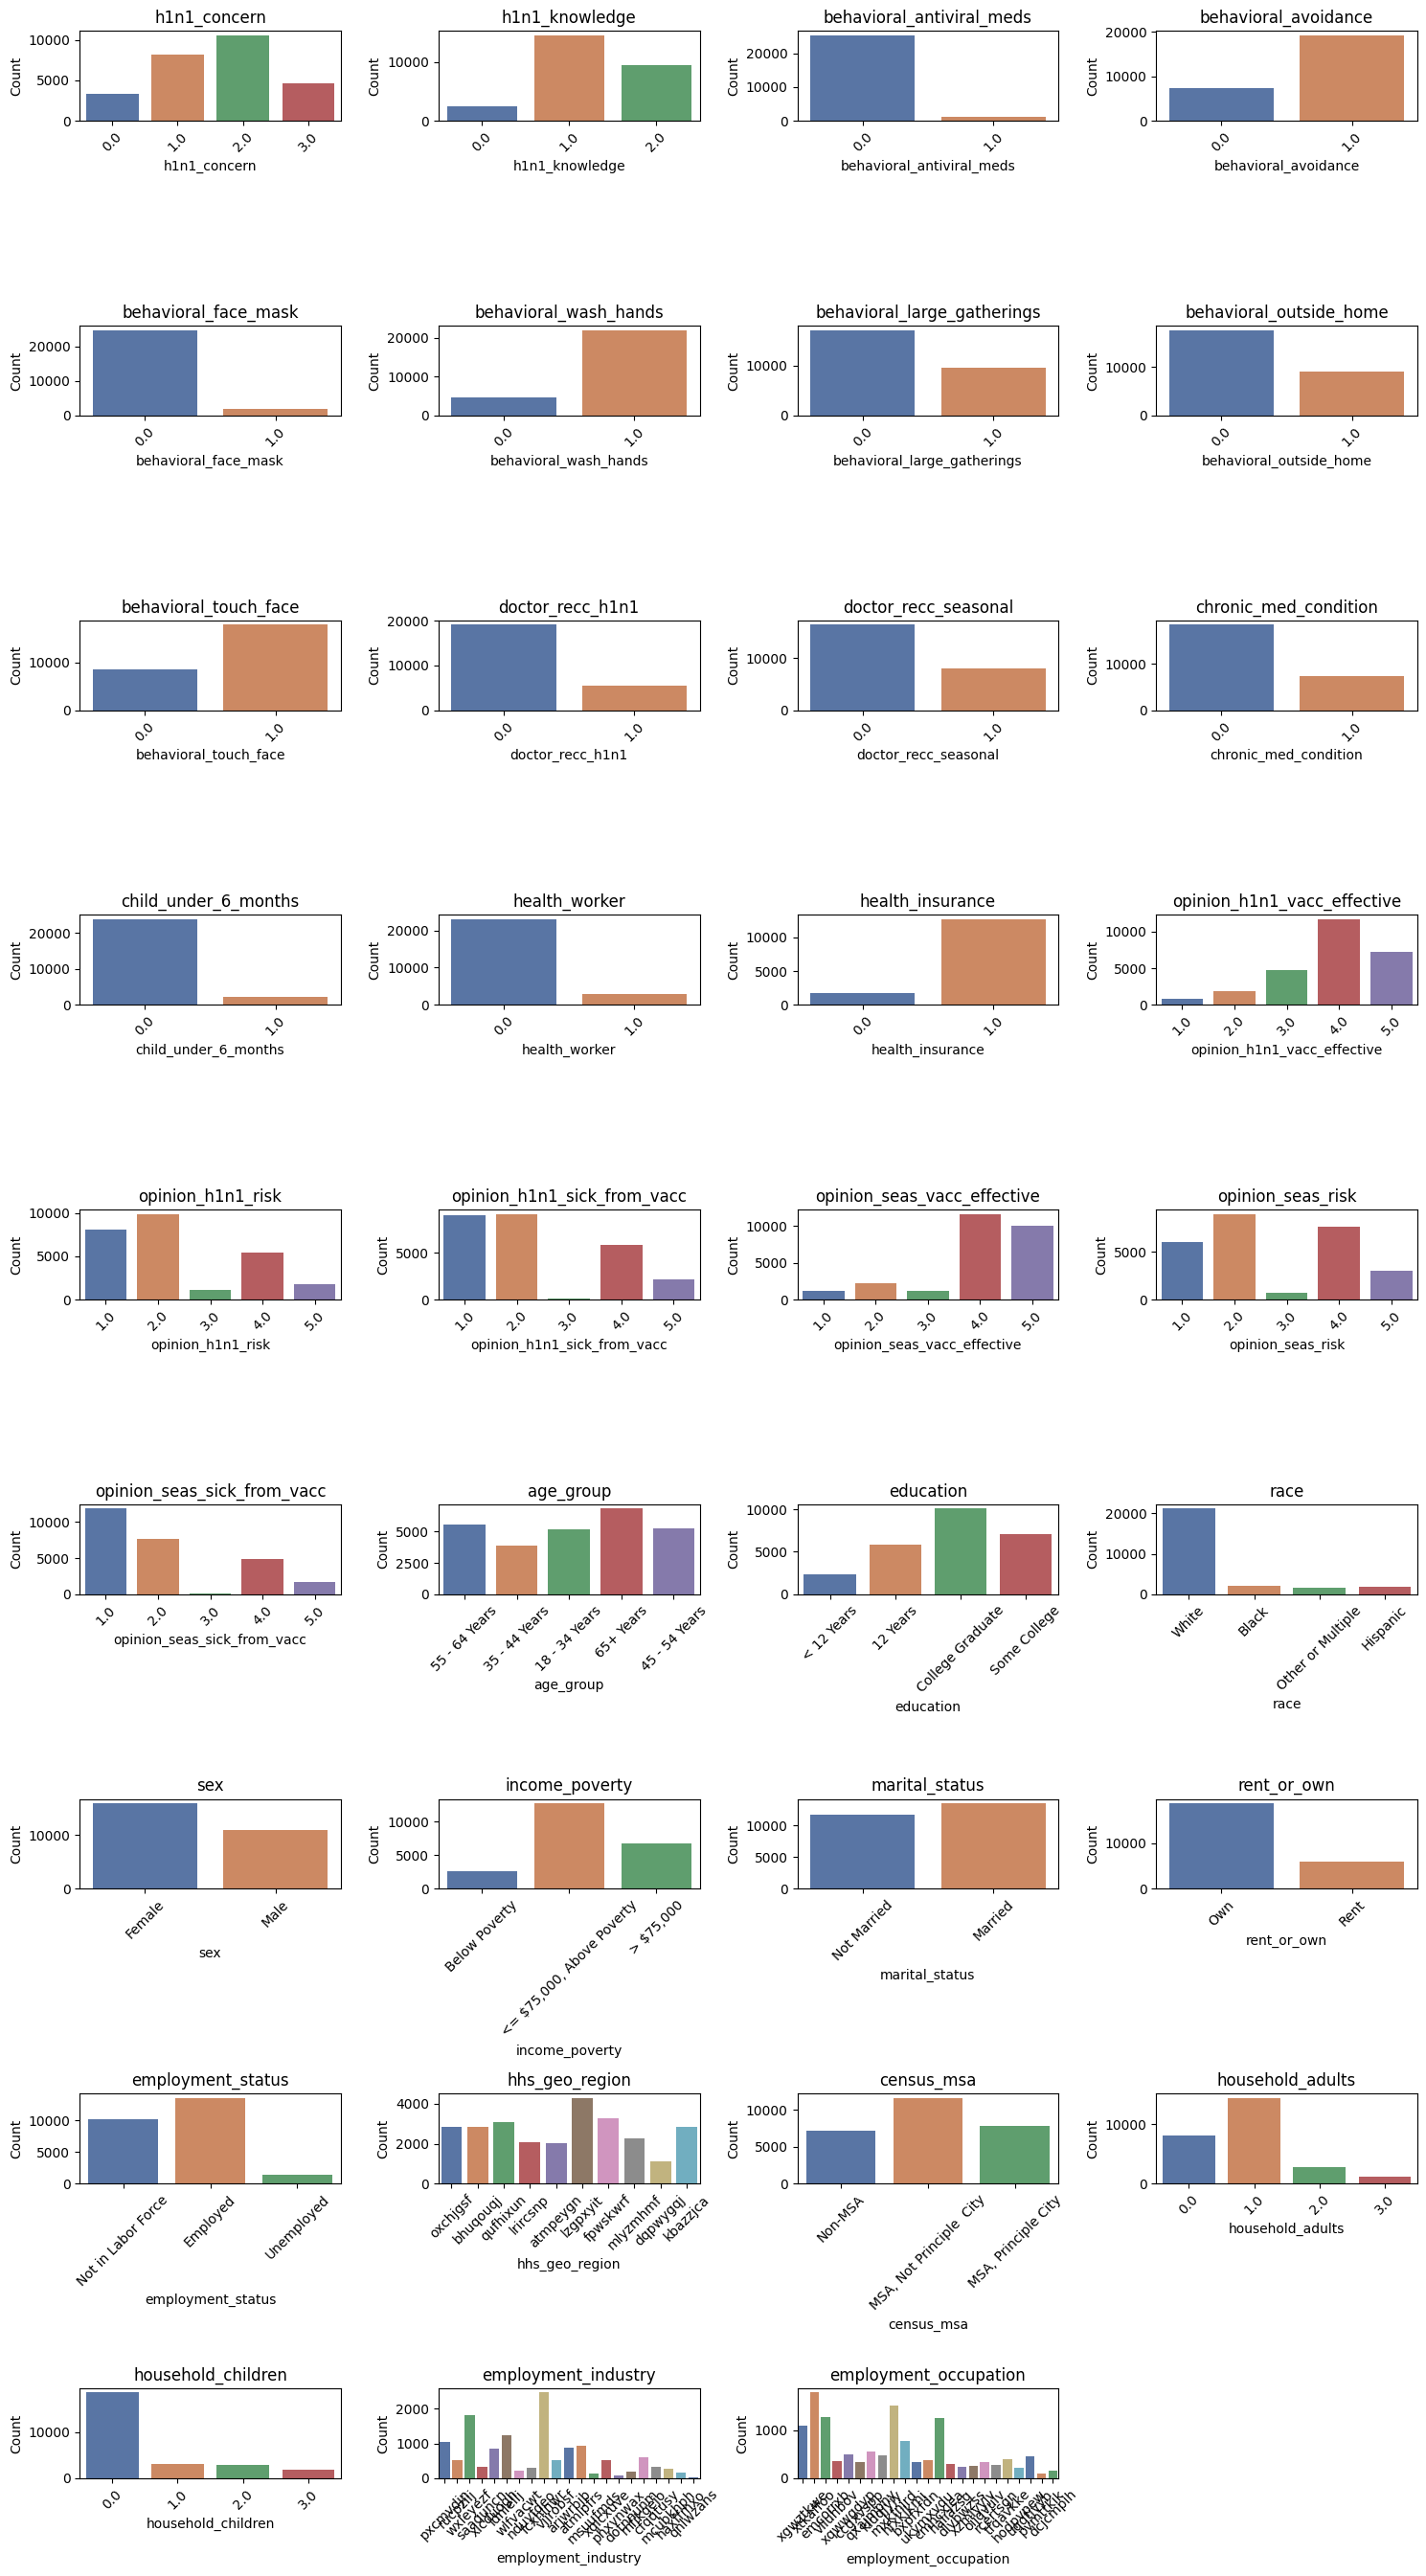

In [61]:
columns = training_set_features_df.columns[:]

# Calculate the number of rows and columns for the subplots
num_rows = (len(columns) + 3) // 4
num_cols = min(len(columns), 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

axes = axes.flatten()

# Generate the distribution plots
for i, column in enumerate(columns):
    sns.countplot(x=column, data=training_set_features_df, ax=axes[i], palette='deep')
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Count")

# Remove any empty subplots
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3.2. Training set labels

There are two target variables (both are binary variables: 0 = No; 1 = Yes):
- h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
- seasonal_vaccine - Whether respondent received seasonal flu vaccine.


The first column 'respondent_id' is a unique and random identifier.

In [62]:
training_set_labels_df.head(5)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [63]:
training_set_labels_df.head(5)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


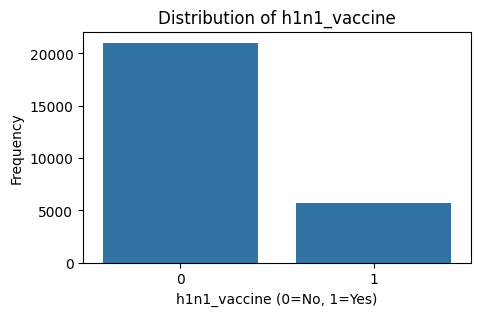

In [64]:
# Plot for the distribution of h1n1_vaccine
plt.figure(figsize=(5, 3))  
sns.countplot(x='h1n1_vaccine', data=training_set_labels_df) 
plt.title('Distribution of h1n1_vaccine')
plt.xlabel('h1n1_vaccine (0=No, 1=Yes)')
plt.ylabel('Frequency')
plt.show()

The distribution of the h1n1_vaccine variable is imbalanced. As shown in the graph, there are significantly more examples of 0 (respondents who didn't receive the H1N1 vaccine) than 1 (respondents who did receive the vaccine). This imbalance indicates that a larger proportion of respondents didn't receive the H1N1 vaccine.

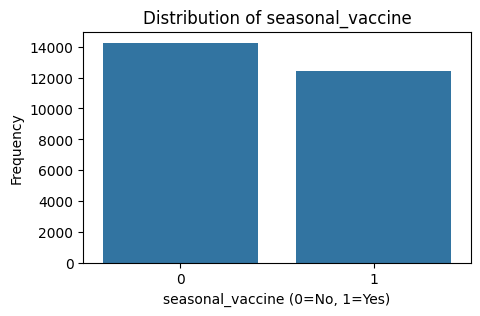

In [65]:
# Plot for the distribution of seasonal_vaccine
plt.figure(figsize=(5, 3))
sns.countplot(x='seasonal_vaccine', data=training_set_labels_df) 
plt.title('Distribution of seasonal_vaccine') 
plt.xlabel('seasonal_vaccine (0=No, 1=Yes)') 
plt.ylabel('Frequency')
plt.show()

The distribution of the seasonal_vaccine variable is more balanced. The number of people who have received the vaccine is similar to the number of those who haven't received it.

### 3.3. Test set features

This dataset will be used by the different trained models to generate predictions.

In [66]:
test_set_features_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [67]:
test_set_features_df.head(5)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [68]:
test_set_features_df.shape

(26708, 35)

In [69]:
test_set_features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26623.000000,26586.000000,26629.000000,26495.000000,26689.000000,26668.000000,26636.000000,26626.000000,26580.000000,24548.000000,...,25919.000000,14480.000000,26310.000000,26328.000000,26333.000000,26256.000000,26209.000000,26187.000000,26483.000000,26483.000000
mean,1.623145,1.266042,0.049645,0.729798,0.069279,0.826084,0.351517,0.337227,0.683747,0.222666,...,0.111501,0.887914,3.844622,2.326838,2.360612,4.024832,2.708688,2.143392,0.894310,0.543745
std,0.902755,0.615617,0.217215,0.444072,0.253934,0.379045,0.477453,0.472772,0.465022,0.416044,...,0.314758,0.315483,1.007570,1.275636,1.359413,1.083204,1.376045,1.339102,0.754244,0.935057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


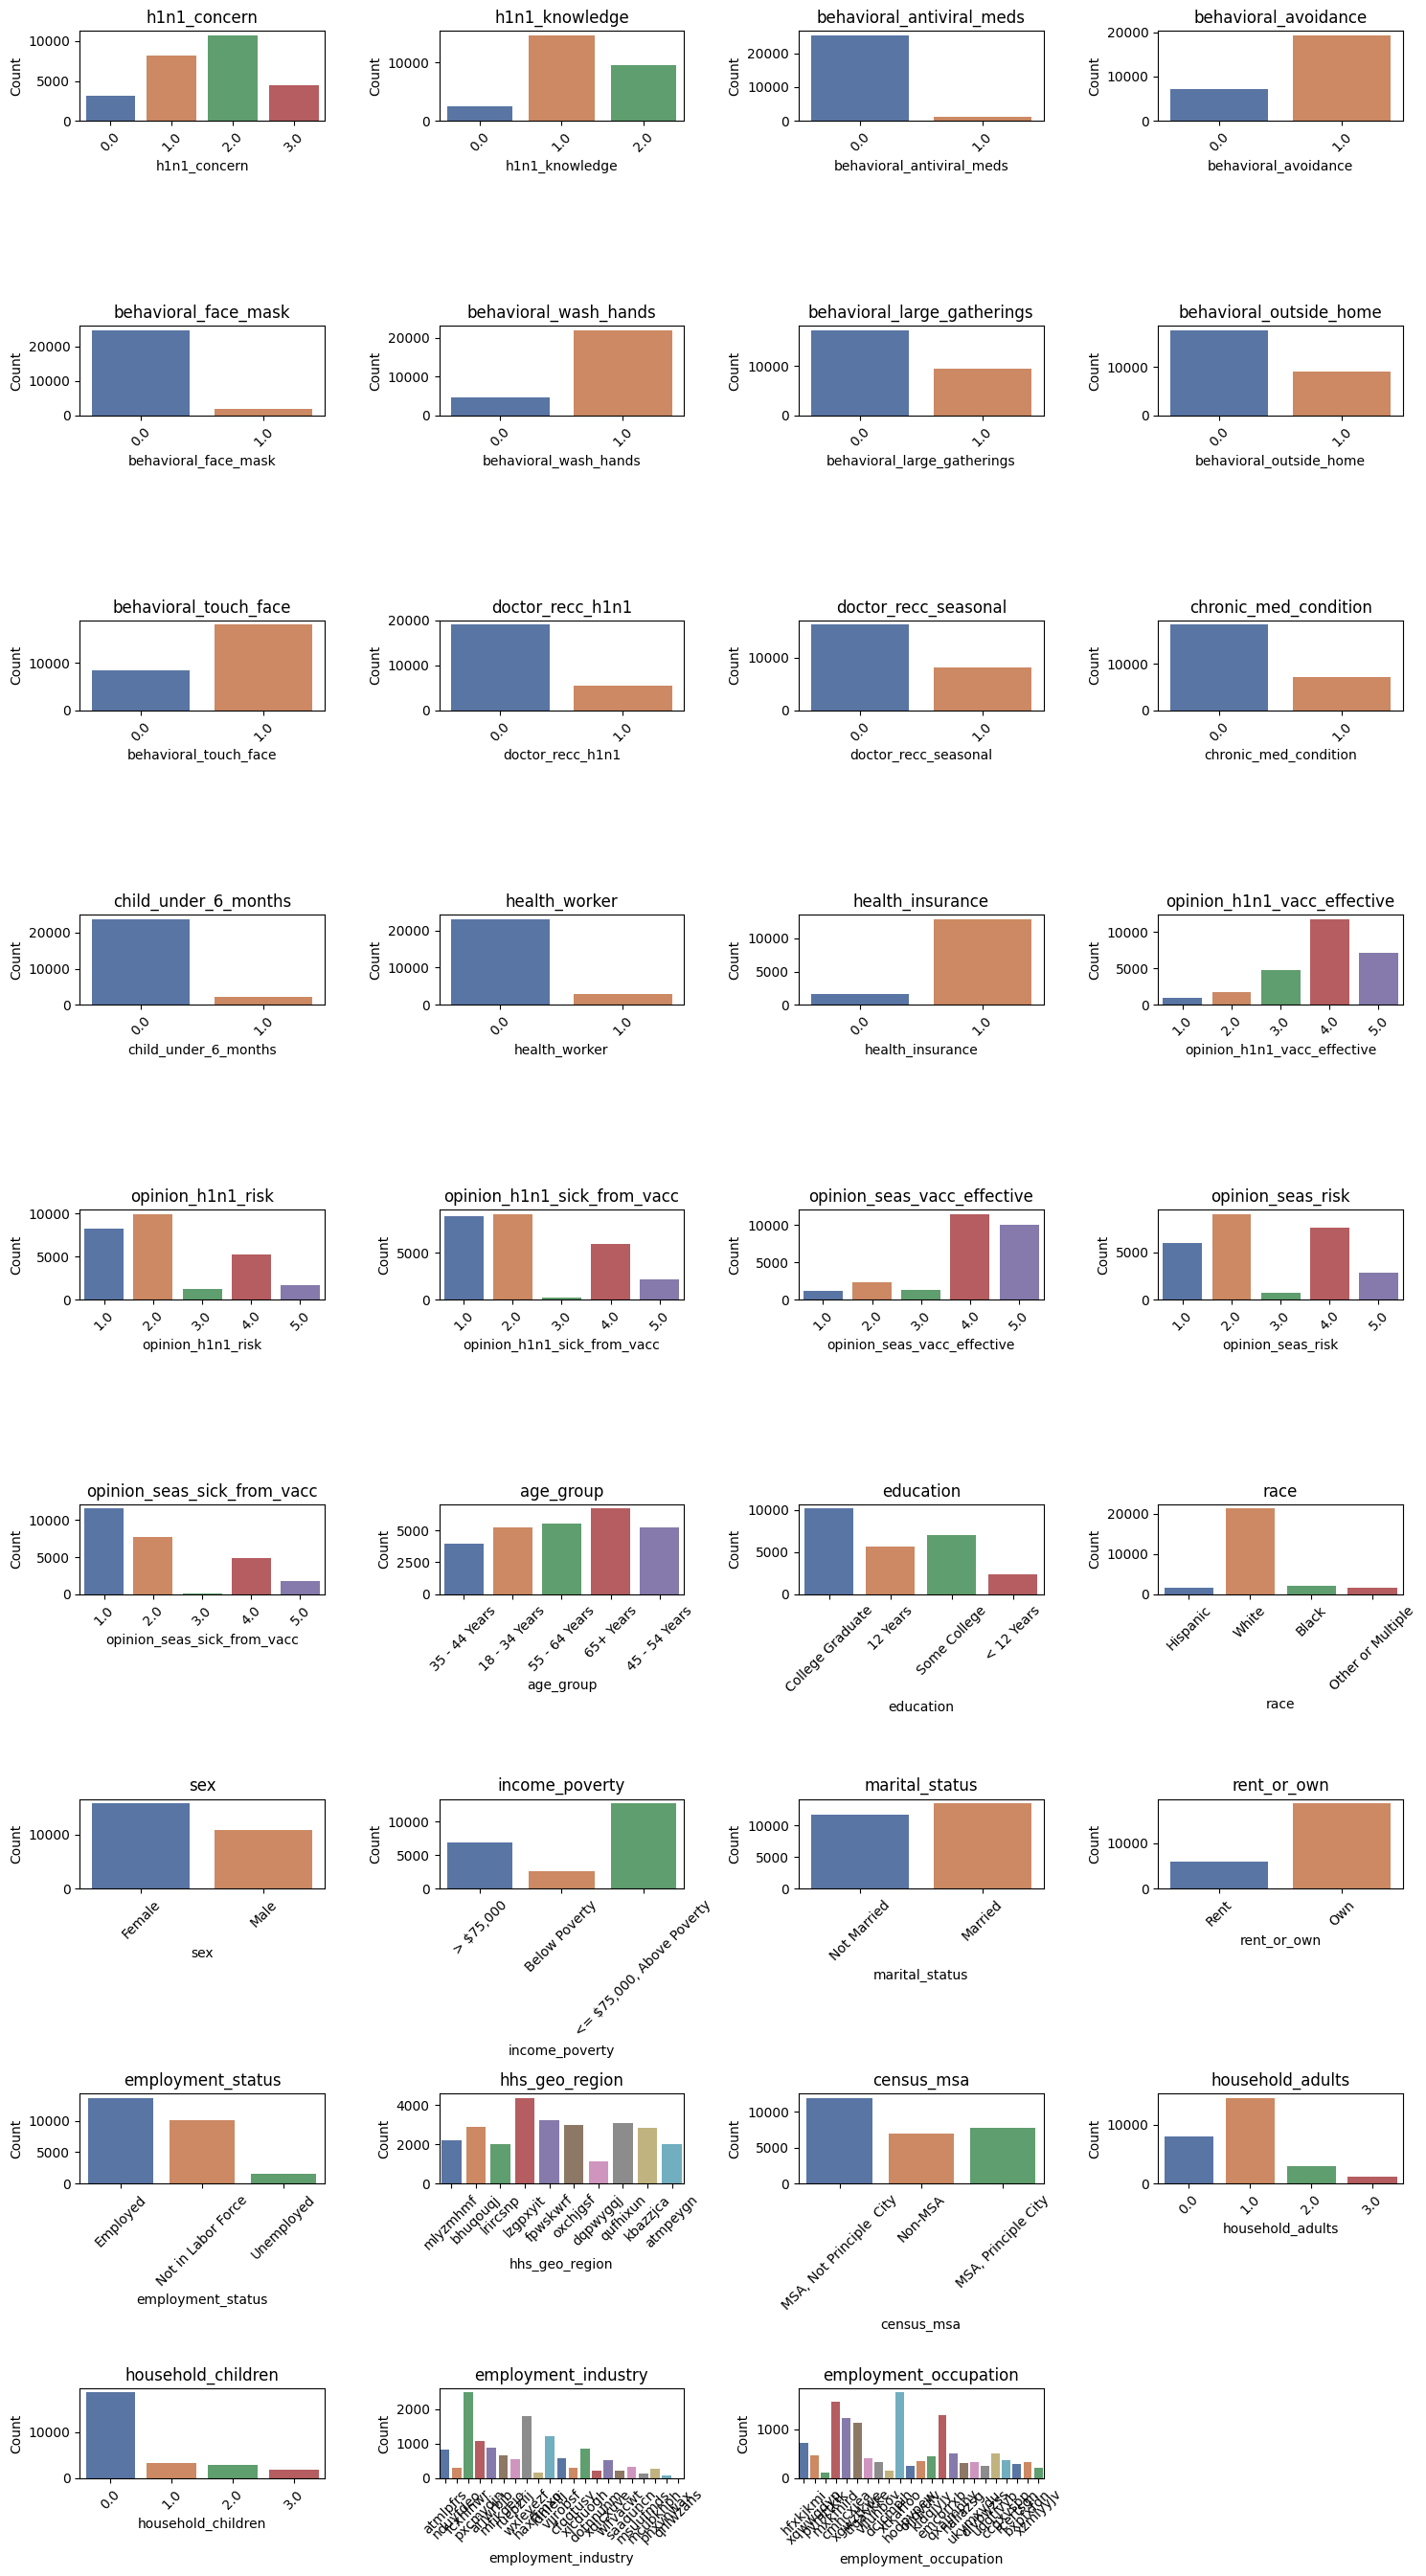

In [70]:
columns = test_set_features_df.columns[:]

# Calculate the number of rows and columns for the subplots
num_rows = (len(columns) + 3) // 4
num_cols = min(len(columns), 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

axes = axes.flatten()

# Generate the distribution plots
for i, column in enumerate(columns):
    sns.countplot(x=column, data=test_set_features_df, ax=axes[i], palette='deep')
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Count")

# Remove any empty subplots
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 4. Encoding and Treatment of Missing Values

- Proportion of missing values in the training set features.

In [71]:
training_set_features_df.isna().sum().sort_values(ascending=False)/len(training_set_features_df)

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_h1n1_sick_from_vacc    0.014790
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
household_children             0.009323
household_adults               0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004343
h1n1_concern                   0.003445


In [72]:
training_set_features_df.drop(columns=['employment_occupation', 'employment_industry', 'health_insurance'], inplace=True)
training_set_features_df.shape

(26707, 32)

In [73]:
test_set_features_df.isna().sum().sort_values(ascending=False)/len(test_set_features_df)

employment_occupation          0.502696
employment_industry            0.497042
health_insurance               0.457840
income_poverty                 0.168377
doctor_recc_seasonal           0.080875
doctor_recc_h1n1               0.080875
rent_or_own                    0.076232
employment_status              0.055077
marital_status                 0.053991
education                      0.052681
chronic_med_condition          0.034896
child_under_6_months           0.030440
health_worker                  0.029542
opinion_seas_sick_from_vacc    0.019507
opinion_seas_risk              0.018684
opinion_seas_vacc_effective    0.016924
opinion_h1n1_vacc_effective    0.014902
opinion_h1n1_risk              0.014228
opinion_h1n1_sick_from_vacc    0.014041
household_adults               0.008424
household_children             0.008424
behavioral_avoidance           0.007975
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004568
h1n1_concern                   0.003183


In [74]:
test_set_features_df.drop(columns=['employment_occupation', 'employment_industry', 'health_insurance'], inplace=True)
test_set_features_df.shape

(26708, 32)

- What should we do with the features which have a small percentage of missing values?
    - The null values will be imputed. 

- To impute null values, we will use different Imputers.
    - On the one hand, for the numerical columns, a KNNImputer will be considered.
    - With respect to categorical variables, those which take less than 10 different values will be imputed by OneHotEncoder.
    - Lastly, those categorical variables which have more than 10 different values will be imputed with CountEncoder (frequency encoder).

In [75]:
numerical_columns = []
one_hot_encoding_columns = []
frequency_columns = []
for col in training_set_features_df.columns:
    if training_set_features_df[col].dtype == 'float64' or training_set_features_df[col].dtype == 'int64':
        numerical_columns.append(col)
    elif training_set_features_df[col].nunique() < 10:
        one_hot_encoding_columns.append(col)
    else:
        frequency_columns.append(col)

print(f'Numerical columns: {numerical_columns}')
print(f'\nOne hot encoding columns: {one_hot_encoding_columns}')
print(f'\nFrequency columns: {frequency_columns}')


Numerical columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']

One hot encoding columns: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

Frequency columns: ['hhs_geo_region']


In [76]:
# === 1. Process Numerical Columns ===
# 1.1 Impute missing values using IterativeImputer
#KNNImputer(n_neighbors=70,weights="distance")
# KNNImputer(n_neighbors=70,weights="distance"
# SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_data = training_set_features_df[numerical_columns]
numerical_data_imputed = numerical_imputer.fit_transform(numerical_data)

# 1.2 Scale the data using MinMaxScaler
scaler = MinMaxScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data_imputed)

# Convert back to DataFrame
numerical_data_final = pd.DataFrame(numerical_data_scaled, columns=numerical_columns)


# === 2. Process One-Hot Encoding Columns ===
# 2.1 Impute missing values with 'Unknown' for categorical variables
one_hot_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
one_hot_data = training_set_features_df[one_hot_encoding_columns]
one_hot_data_imputed = one_hot_imputer.fit_transform(one_hot_data)

# 2.2 One-Hot encode the categorical columns
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoded_data = one_hot_encoder.fit_transform(one_hot_data_imputed)
# Convertir la matriz dispersa a un array denso
one_hot_encoded_data_dense = one_hot_encoded_data.toarray()
# Convert back to DataFrame
one_hot_encoded_columns = one_hot_encoder.get_feature_names_out(one_hot_encoding_columns)
# Crear el DataFrame correctamente con el array denso y los nombres de columnas
one_hot_data_final = pd.DataFrame(one_hot_encoded_data_dense, columns=one_hot_encoded_columns, index=training_set_features_df.index)

# === 3. Process Frequency Encoded Columns ===
# 3.1 Frequency encode the categorical columns
frequency_encoder = ce.CountEncoder(normalize=True, min_group_size=0.05)
frequency_data = training_set_features_df[frequency_columns]
frequency_data_encoded = frequency_encoder.fit_transform(frequency_data)

# 3.2 Impute missing values using IterativeImputer
frequency_imputer = IterativeImputer(max_iter=100, random_state=42)
frequency_data_imputed = frequency_imputer.fit_transform(frequency_data_encoded)

# Convert back to DataFrame
frequency_data_final = pd.DataFrame(frequency_data_imputed, columns=frequency_columns, index=training_set_features_df.index)


# === 4. Concatenate the Processed Columns ===
X_train_df = pd.concat([numerical_data_final, one_hot_data_final, frequency_data_final], axis=1)

# Print the final processed data
print(f'Final processed data shape: {X_train_df.shape}')


Final processed data shape: (26707, 56)


In [77]:
X_train_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own_Rent,rent_or_own_Unknown,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,employment_status_Unknown,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,hhs_geo_region
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.107051
1,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.106564
2,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.220312,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.116149
3,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.077807
4,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.116149


In [78]:
# Export the CSV.
X_train_df.index.name = 'respondent_id'
X_train_df.to_csv('./gold/X_train_df.csv', index=True)



In [79]:
numerical_columns = []
one_hot_encoding_columns = []
frequency_columns = []
for col in test_set_features_df.columns:
    if test_set_features_df[col].dtype == 'float64' or test_set_features_df[col].dtype == 'int64':
        numerical_columns.append(col)
    elif test_set_features_df[col].nunique() < 10:
        one_hot_encoding_columns.append(col)
    else:
        frequency_columns.append(col)

print(f'Numerical columns: {numerical_columns}')
print(f'\nOne hot encoding columns: {one_hot_encoding_columns}')
print(f'\nFrequency columns: {frequency_columns}')


Numerical columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']

One hot encoding columns: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

Frequency columns: ['hhs_geo_region']


In [80]:
# === 1. Process Numerical Columns ===
# 1.1 Impute missing values using IterativeImputer
#KNNImputer(n_neighbors=70,weights="distance")
# KNNImputer(n_neighbors=70,weights="distance")
# SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_data = test_set_features_df[numerical_columns]
numerical_data_imputed = numerical_imputer.fit_transform(numerical_data)

# 1.2 Scale the data using MinMaxScaler
scaler = MinMaxScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data_imputed)

# Convert back to DataFrame
numerical_data_final = pd.DataFrame(numerical_data_scaled, columns=numerical_columns, index=test_set_features_df.index)



# === 2. Process One-Hot Encoding Columns ===
# 2.1 Impute missing values with 'Unknown' for categorical variables
one_hot_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
one_hot_data = test_set_features_df[one_hot_encoding_columns]
one_hot_data_imputed = one_hot_imputer.fit_transform(one_hot_data)

# 2.2 One-Hot encode the categorical columns
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoded_data = one_hot_encoder.fit_transform(one_hot_data_imputed)
# Convertir la matriz dispersa a un array denso
one_hot_encoded_data_dense = one_hot_encoded_data.toarray()
# Convert back to DataFrame
one_hot_encoded_columns = one_hot_encoder.get_feature_names_out(one_hot_encoding_columns)
# Crear el DataFrame correctamente con el array denso y los nombres de columnas
one_hot_data_final = pd.DataFrame(one_hot_encoded_data_dense, columns=one_hot_encoded_columns, index=test_set_features_df.index)

# === 3. Process Frequency Encoded Columns ===
# 3.1 Frequency encode the categorical columns
frequency_encoder = ce.CountEncoder(normalize=True, min_group_size=0.05)
frequency_data = test_set_features_df[frequency_columns]
frequency_data_encoded = frequency_encoder.fit_transform(frequency_data)

# 3.2 Impute missing values using IterativeImputer
frequency_imputer = IterativeImputer(max_iter=100, random_state=42)
frequency_data_imputed = frequency_imputer.fit_transform(frequency_data_encoded)

# Convert back to DataFrame
frequency_data_final = pd.DataFrame(frequency_data_imputed, columns=frequency_columns, index=test_set_features_df.index)

# === 4. Concatenate the Processed Columns ===
X_test_df = pd.concat([numerical_data_final, one_hot_data_final, frequency_data_final], axis=1)

# Print the final processed data
print(f'Final processed data shape: {X_test_df.shape}')


Final processed data shape: (26708, 56)


In [81]:
# Export the CSV.
X_test_df.index.name = 'respondent_id'
X_test_df.to_csv('./gold/X_test_df.csv', index=True)